This notebook starts from a JSON file thats generated after the models inference.

Outputs of this file are:

1.   Image of ball position on x-axis (no homography correction applied)
2.   Image of ball position on y-axis (no homography correction applied)
3.   Image of confidence per frame
4.   Excel file with interpolated results
5.   JSON file with interpolated results for later usage



# **Import libraries**

In [1]:
import json
import pandas as pd
import os

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # This is the essential 3D import
import numpy as np

import plotly.express as px

# **Initialize variables**

In [2]:
json_file_path = '/content/player_ball_video.json'
excel_file_path = "/content/ball_tracking_data.xlsx"

df = pd.DataFrame(columns=['frame', 'x', 'y', 'confidence'])

# **Run code**

## **Extract data from json into excel file**

In [3]:
if not os.path.exists(json_file_path):
  print(f"Error: Input JSON file not found at {json_file_path}")

try:
  with open(json_file_path, 'r') as f:
    data = json.load(f)

except json.JSONDecodeError:
  print(f"Error: Could not decode JSON from {json_file_path}")
except Exception as e:
  print(f"An unexpected error occurred while reading the JSON file: {e}")

In [4]:
frame_data_key = None

for key, value in data.items():
  if isinstance(value, list) and key not in ['frame_offset', 'time_offset']:
    frame_data_key = key
    break

if not frame_data_key:
    print("Error: Could not find the main prediction data list in the JSON structure.")

In [5]:
extracted_data = []

detection_frames = data.get(frame_data_key, [])

for detection in detection_frames:
  if detection.get('class_id') == 'ball':
    frame_id = detection.get('frame_id')
    x = (detection.get('x_min')+detection.get('x_max'))/2
    y = (detection.get('y_min')+detection.get('y_max'))/2
    confidence = detection.get('confidence')

    row = {
        'frame': frame_id, # Use frame_id from detection
        'x': x,
        'y': y,
        'confidence': confidence,
        'class_id': 'ball'
    }
    extracted_data.append(row)

In [6]:
df = pd.DataFrame(extracted_data)

if df.empty:
  print(f"Warning: No ball detections found in the JSON file.")

print(df.head(20))

    frame       x      y  confidence class_id
0       0  1070.0  368.0    0.597126     ball
1       1  1067.5  369.5    0.605423     ball
2       2  1066.0  372.5    0.663537     ball
3       3  1063.5  375.5    0.646803     ball
4       4  1062.0  378.5    0.514805     ball
5       5  1059.5  383.0    0.474694     ball
6       8  1050.5  400.5    0.553874     ball
7       9  1050.0  406.0    0.504086     ball
8      10  1049.0  412.0    0.657259     ball
9      11  1048.0  419.0    0.578641     ball
10     12  1043.5  426.0    0.677670     ball
11     13  1042.0  435.0    0.597998     ball
12     14  1040.5  441.5    0.718237     ball
13     15  1036.5  451.5    0.686545     ball
14     16  1036.0  462.5    0.622713     ball
15     17  1032.5  471.5    0.625954     ball
16     18  1059.5  493.0    0.654056     ball
17     18  1022.0  463.5    0.587343     ball
18     19  1000.0  445.5    0.649097     ball
19     20   990.0  436.0    0.627333     ball


## **Complete blanks for frames were ball was not detected**

In [7]:
df = df.drop_duplicates(subset=['frame'], keep='first') # Now drop duplicates based on the 'frame' column

print(df.head(20))

    frame       x      y  confidence class_id
0       0  1070.0  368.0    0.597126     ball
1       1  1067.5  369.5    0.605423     ball
2       2  1066.0  372.5    0.663537     ball
3       3  1063.5  375.5    0.646803     ball
4       4  1062.0  378.5    0.514805     ball
5       5  1059.5  383.0    0.474694     ball
6       8  1050.5  400.5    0.553874     ball
7       9  1050.0  406.0    0.504086     ball
8      10  1049.0  412.0    0.657259     ball
9      11  1048.0  419.0    0.578641     ball
10     12  1043.5  426.0    0.677670     ball
11     13  1042.0  435.0    0.597998     ball
12     14  1040.5  441.5    0.718237     ball
13     15  1036.5  451.5    0.686545     ball
14     16  1036.0  462.5    0.622713     ball
15     17  1032.5  471.5    0.625954     ball
16     18  1059.5  493.0    0.654056     ball
18     19  1000.0  445.5    0.649097     ball
19     20   990.0  436.0    0.627333     ball
20     23   944.5  404.5    0.506556     ball


In [8]:
"""
df = df.sort_values(by='frame')
# If 'frame' is already the index, reset it to a column first
if df.index.name == 'frame' and 'frame' not in df.columns:
    df = df.reset_index()
"""

df = df.set_index('frame') # Set 'frame' back as the index

print(df.head(20))

            x      y  confidence class_id
frame                                    
0      1070.0  368.0    0.597126     ball
1      1067.5  369.5    0.605423     ball
2      1066.0  372.5    0.663537     ball
3      1063.5  375.5    0.646803     ball
4      1062.0  378.5    0.514805     ball
5      1059.5  383.0    0.474694     ball
8      1050.5  400.5    0.553874     ball
9      1050.0  406.0    0.504086     ball
10     1049.0  412.0    0.657259     ball
11     1048.0  419.0    0.578641     ball
12     1043.5  426.0    0.677670     ball
13     1042.0  435.0    0.597998     ball
14     1040.5  441.5    0.718237     ball
15     1036.5  451.5    0.686545     ball
16     1036.0  462.5    0.622713     ball
17     1032.5  471.5    0.625954     ball
18     1059.5  493.0    0.654056     ball
19     1000.0  445.5    0.649097     ball
20      990.0  436.0    0.627333     ball
23      944.5  404.5    0.506556     ball


In [9]:
start_frame = df.index.min()
end_frame = df.index.max()
print(f"Detected frame range: {start_frame} to {end_frame}")

full_index = pd.RangeIndex(start=start_frame, stop=end_frame + 1, step=1)
df= df.reindex(full_index) # Adds the missing frames

print(df.head(20))

Detected frame range: 0 to 283
         x      y  confidence class_id
0   1070.0  368.0    0.597126     ball
1   1067.5  369.5    0.605423     ball
2   1066.0  372.5    0.663537     ball
3   1063.5  375.5    0.646803     ball
4   1062.0  378.5    0.514805     ball
5   1059.5  383.0    0.474694     ball
6      NaN    NaN         NaN      NaN
7      NaN    NaN         NaN      NaN
8   1050.5  400.5    0.553874     ball
9   1050.0  406.0    0.504086     ball
10  1049.0  412.0    0.657259     ball
11  1048.0  419.0    0.578641     ball
12  1043.5  426.0    0.677670     ball
13  1042.0  435.0    0.597998     ball
14  1040.5  441.5    0.718237     ball
15  1036.5  451.5    0.686545     ball
16  1036.0  462.5    0.622713     ball
17  1032.5  471.5    0.625954     ball
18  1059.5  493.0    0.654056     ball
19  1000.0  445.5    0.649097     ball


In [10]:
missing_count_x = df['x'].isnull().sum()
print(f"Identified {missing_count_x} missing frame(s) for interpolation.\n")

print(df.head(20))

Identified 118 missing frame(s) for interpolation.

         x      y  confidence class_id
0   1070.0  368.0    0.597126     ball
1   1067.5  369.5    0.605423     ball
2   1066.0  372.5    0.663537     ball
3   1063.5  375.5    0.646803     ball
4   1062.0  378.5    0.514805     ball
5   1059.5  383.0    0.474694     ball
6      NaN    NaN         NaN      NaN
7      NaN    NaN         NaN      NaN
8   1050.5  400.5    0.553874     ball
9   1050.0  406.0    0.504086     ball
10  1049.0  412.0    0.657259     ball
11  1048.0  419.0    0.578641     ball
12  1043.5  426.0    0.677670     ball
13  1042.0  435.0    0.597998     ball
14  1040.5  441.5    0.718237     ball
15  1036.5  451.5    0.686545     ball
16  1036.0  462.5    0.622713     ball
17  1032.5  471.5    0.625954     ball
18  1059.5  493.0    0.654056     ball
19  1000.0  445.5    0.649097     ball


In [11]:
missing_rows_mask = df['x'].isna()

df[['x', 'y']] = df[['x', 'y']].interpolate(method='linear', limit= 10,limit_direction='both')

df.loc[missing_rows_mask, 'class_id'] = 'ball' # leaving 'confidence' as NaN will help me to know which are the values that are interpolated and which ones aren't

print(df.head(20))

         x           y  confidence class_id
0   1070.0  368.000000    0.597126     ball
1   1067.5  369.500000    0.605423     ball
2   1066.0  372.500000    0.663537     ball
3   1063.5  375.500000    0.646803     ball
4   1062.0  378.500000    0.514805     ball
5   1059.5  383.000000    0.474694     ball
6   1056.5  388.833333         NaN     ball
7   1053.5  394.666667         NaN     ball
8   1050.5  400.500000    0.553874     ball
9   1050.0  406.000000    0.504086     ball
10  1049.0  412.000000    0.657259     ball
11  1048.0  419.000000    0.578641     ball
12  1043.5  426.000000    0.677670     ball
13  1042.0  435.000000    0.597998     ball
14  1040.5  441.500000    0.718237     ball
15  1036.5  451.500000    0.686545     ball
16  1036.0  462.500000    0.622713     ball
17  1032.5  471.500000    0.625954     ball
18  1059.5  493.000000    0.654056     ball
19  1000.0  445.500000    0.649097     ball


In [12]:
df = df.reset_index(names=['frame'])

print(df.head(20))

    frame       x           y  confidence class_id
0       0  1070.0  368.000000    0.597126     ball
1       1  1067.5  369.500000    0.605423     ball
2       2  1066.0  372.500000    0.663537     ball
3       3  1063.5  375.500000    0.646803     ball
4       4  1062.0  378.500000    0.514805     ball
5       5  1059.5  383.000000    0.474694     ball
6       6  1056.5  388.833333         NaN     ball
7       7  1053.5  394.666667         NaN     ball
8       8  1050.5  400.500000    0.553874     ball
9       9  1050.0  406.000000    0.504086     ball
10     10  1049.0  412.000000    0.657259     ball
11     11  1048.0  419.000000    0.578641     ball
12     12  1043.5  426.000000    0.677670     ball
13     13  1042.0  435.000000    0.597998     ball
14     14  1040.5  441.500000    0.718237     ball
15     15  1036.5  451.500000    0.686545     ball
16     16  1036.0  462.500000    0.622713     ball
17     17  1032.5  471.500000    0.625954     ball
18     18  1059.5  493.000000  

In [13]:
try:
  df.to_excel(excel_file_path, index=False, sheet_name='Ball Detections')
  print(f"Successfully extracted {len(df)} ball detections.")

except Exception as e:
  print(f"Error occurred while saving to Excel: {e}")

Successfully extracted 284 ball detections.


# **Plot data**

## **2D**

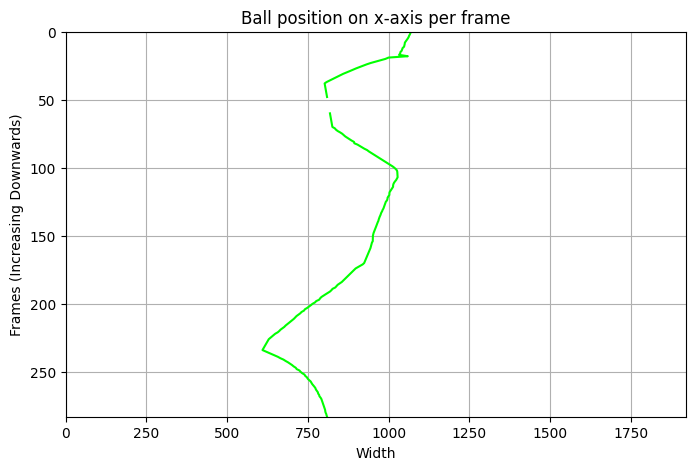

In [14]:
# Image Size (W, H): (1920, 1080)

plt.figure(figsize=(8, 5))
plt.plot(df['x'], df.index, color='lime') # Plotting ball trajectory on x-axis

plt.xlim(0, 1920)
plt.ylim(df.index.max(),0)

plt.title('Ball position on x-axis per frame')
plt.xlabel('Width')
plt.ylabel('Frames (Increasing Downwards)')
plt.grid(True)

plt.savefig('x_ball_per_frame_plot.png')

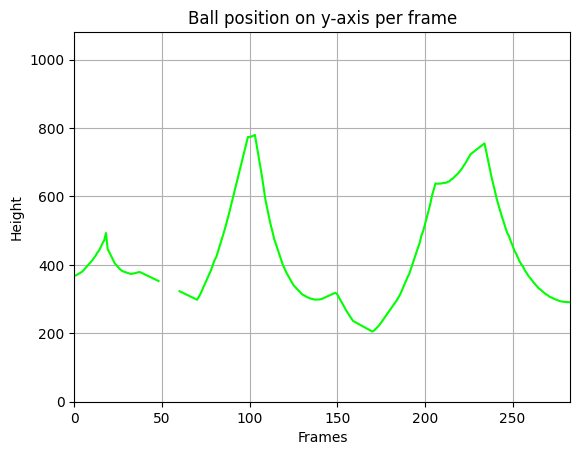

In [15]:
plt.plot(df.index, df['y'], color='lime') # Plotting ball trajectory on y-axis

plt.ylim(0, 1080) # Fix: Use df['x'].max() to get a single maximum value
plt.xlim(0, df.index.max()) # Correct X-axis limit for frames

plt.title('Ball position on y-axis per frame')
plt.xlabel('Frames')
plt.ylabel('Height')
plt.grid(True)

plt.savefig('y_ball_per_frame_plot.png')

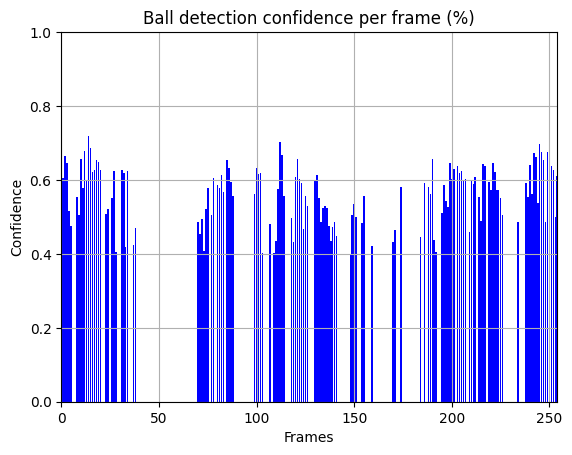

In [16]:
plt.bar(df.index, df['confidence'], color='blue') # Plotting ball trajectory on x-axis

plt.ylim(0, 1)
plt.xlim(0,int(len(detection_frames)/3))

plt.title('Ball detection confidence per frame (%)')
plt.xlabel('Frames')
plt.ylabel('Confidence')
plt.grid(True)

plt.savefig('ball_detection_confidence_per_frame_plot.png')

## **3D**

In [17]:
import pandas as pd
import numpy as np
import plotly.express as px

def create_plotly_3d_scatter(df):
    """
    Creates a highly interactive 3D scatter plot using Plotly Express.
    X = 'x', Y = 'y', Z = 'frame'.

    Args:
        df (pd.DataFrame): The DataFrame containing 'x', 'y', and 'frame' columns.
    """

    fig = px.scatter_3d(
        df,
        x='x',            # X-Axis data
        y=df.index,            # Y-Axis data
        z='y',        # Z-Axis data (Frame Number)
        color=df.index,    # Color the points based on frame number
        title='Interactive 3D Ball Trajectory (Plotly)',
        height=700        # Adjust plot height
    )

    # Get the required min/max values
    x_min, x_max = 0, 1920
    y_min, y_max = 0, 1080

    # Configure the layout and axes
    fig.update_layout(
        scene = {
            # X-axis limits
            'xaxis': dict(range=[x_min, x_max], title='X Coordinate'),

            # Y-axis limits (Setting y_max first effectively inverts the axis)
            # Plotly handles inversion slightly differently but setting the range
            # often gives the desired look in 3D views.
            'yaxis': dict(range = (0, len(detection_frames)/3), title='Frame Number'),

            # Z-axis limits (Frame number)
            'zaxis': dict(range=[y_min, y_max], title='Y Coordinate'),
        },
        margin=dict(l=0, r=0, b=0, t=50)
    )

    fig.show()

create_plotly_3d_scatter(df)

# **Generate new json file with interpolated values from excel**

In [18]:
filename = "player_ball_video_interpolated.json"

try:
  df.to_json(
      filename,
      orient='records',  # Defines the structure of the JSON output
      indent=4           # Makes the JSON file human-readable
      )
  print(f"Success! DataFrame exported to {filename}")

except Exception as e:
  print(f"An error occurred during export: {e}")

Success! DataFrame exported to player_ball_video_interpolated.json
